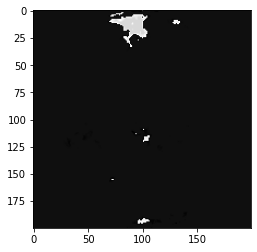

2.75 %
Area: 10472859120.77 km^2


In [89]:
import math
import cv2
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

def BGR2RGB(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def resize(img, x ,y):
    img = cv2.resize(img , dsize=(x, y), interpolation=cv2.INTER_AREA)
    return img

def brightness_up(img, bright):
    M = np.ones(img.shape, dtype = "uint8") * bright
    temp = cv2.add(img, M)
    temp = cv2.add(temp, M)
    return temp

def brightness_down(img, bright):
    M = np.ones(img.shape, dtype = "uint8") * bright
    temp = cv2.subtract(img, M)
    temp = cv2.subtract(temp, M)
    return temp

def crop_img(img, a1, b1, r):
    result = img2[a1-r:a1+r,b1-r:b1+r]
    return img

def remove_background(img, a1, b1, x, y, r):
    img = img[a1-r:a1+r,b1-r:b1+r]
    img = img[y:y+r*2, x:x+r*2]
    mask = np.full((img.shape[0], img.shape[1]), 0, dtype=np.uint8) 
    cv2.circle(mask,(r,r), r, (255, 255, 255),-1)
    fg = cv2.bitwise_or(img, img, mask=mask)
    mask = cv2.bitwise_not(mask)
    background = np.full(img.shape, 255, dtype=np.uint8)
    bk = cv2.bitwise_or(background, background, mask=mask)
    img = cv2.bitwise_or(fg, bk)
    return img

def image_black(img):
    img = img - 120
    return img

def cal_whiteRatio(img):
    k = 10
    img = img.reshape((img.shape[0] * img.shape[1], 3))
    clt = KMeans(n_clusters = k)
    clt.fit(img)
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    hist.sort()
    ratio = sum(hist[:-1])
    return ratio

def cal_coronalHole(ratio, r):
    return (r * r * ratio) * 0.5 * 0.5 * math.pi

def main():
    # Filter for finding Features
    img = cv2.imread('./DATA/01.png',cv2.IMREAD_GRAYSCALE)
    img2 = img.copy()
    img2 = resize(img2, 250, 250)
    img2 = BGR2RGB(img2)
    img2 = brightness_up(img2, 100)
    img2 = remove_background(img2, 123, 123, 0, 0, 100)
    img2 = brightness_down(img2, 60)
    img2 = image_black(img2)
    imgplot = plt.imshow(img2)
    plt.show()
    
    ratio = cal_whiteRatio(img2)
    print(round((ratio * 100),2),'%')
    area = cal_coronalHole(ratio, 696340)
    print('Area:', round(area, 2),"km^2")

if __name__ == '__main__':
    main()